# Computer Vision Course

> Date: Setember 22, 2020

Code made based in a computer vision course introduced by professor Glauco on the event "Semana Univeritária" in UnB/FGA.

## 1. Working with images and Histogram

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Read image
img = cv2.imread('lenna.png')

# Convert RGB image to  gray scale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

In [115]:
def my_hist(img):
    # Get number of lines and columns
    qntI, qntJ = img.shape
    
    # Creating Histogram manually
    histogram = np.zeros(256)

    for i in range(qntI):
        for j in range(qntJ):
            color = img[i, j]
            histogram[color] += 1
    return histogram
    

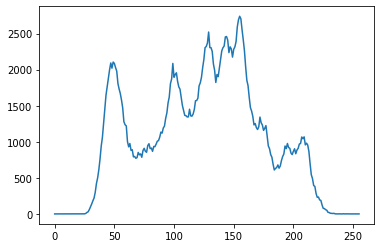

In [116]:
histogram = my_hist(img)
plt.plot(histogram)

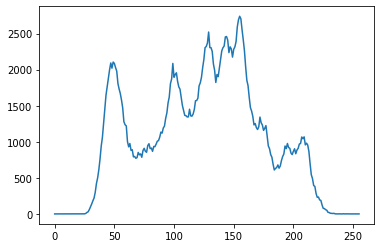

In [117]:
# Using a built-in function

histogram_cv = cv2.calcHist([img], [0], None, [256], [0, 255])

plt.plot(histogram_cv)
plt.show()

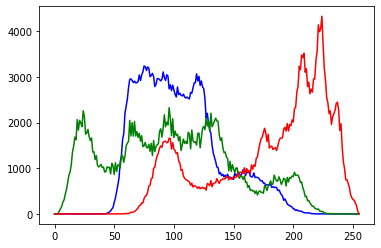

In [118]:
# Plotting a RGB version

img = cv2.imread('lenna.png')

# Blue channel
histogram_cv_b = cv2.calcHist([img], [0], None, [256], [0, 255])
# Green channel
histogram_cv_g = cv2.calcHist([img], [1], None, [256], [0, 255])
# Red channel
histogram_cv_r = cv2.calcHist([img], [2], None, [256], [0, 255])

plt.plot(histogram_cv_b, 'b')
plt.plot(histogram_cv_g, 'g')
plt.plot(histogram_cv_r, 'r')
plt.show()

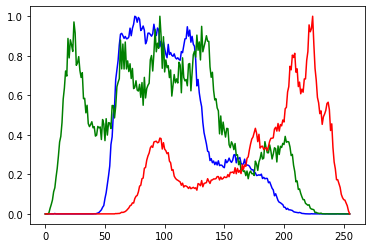

In [119]:
# Normalized version

# Read image
img = cv2.imread('lenna.png')

# Blue channel
histogram_cv_b = cv2.calcHist([img], [0], None, [256], [0, 255])
# Green channel
histogram_cv_g = cv2.calcHist([img], [1], None, [256], [0, 255])
# Red channel
histogram_cv_r = cv2.calcHist([img], [2], None, [256], [0, 255])

histogram_cv_b = (histogram_cv_b - np.amin(histogram_cv_b)) /  (np.amax(histogram_cv_b) - np.amin(histogram_cv_b))
histogram_cv_g = (histogram_cv_g - np.amin(histogram_cv_g)) /  (np.amax(histogram_cv_g) - np.amin(histogram_cv_g))
histogram_cv_r = (histogram_cv_r - np.amin(histogram_cv_r)) /  (np.amax(histogram_cv_r) - np.amin(histogram_cv_r))

plt.plot(histogram_cv_b, 'b')
plt.plot(histogram_cv_g, 'g')
plt.plot(histogram_cv_r, 'r')
plt.show()

In [184]:
def get_histogram(img, norm = True, plot = True, my_version = False):
    histogram = {}
    if(len(img.shape) > 2):
        _, _, colors = img.shape = img.shape
        plot_color = ['b', 'g', 'r']
        plt.figure()
        for c in range(colors):
            if(my_version):
                histogram[c] = my_hist(img[c])
            else:
                histogram[c] = cv2.calcHist([img], [c], None, [256], [0, 255])

            if(norm):
                # Normalized version
                histogram[c] = (histogram[c] - np.amin(histogram[c])) /  (np.amax(histogram[c]) - np.amin(histogram[c]))
            if(plot):
                
                plt.plot(histogram[c], plot_color[c] ,label='%c' % plot_color[c])
                plt.legend()
    else:
        if(my_version):
            histogram = my_hist(img)
        else:
            histogram = cv2.calcHist([img], [0], None, [256], [0, 255])
        
        if(norm):
            # Normalized version
            histogram = (histogram - np.amin(histogram)) /  (np.amax(histogram) - np.amin(histogram))
        if(plot):
            plt.figure()
            plt.plot(histogram, 'b' ,label='Histogram of a gray scaled image')
            plt.legend()
    if(plot):
        plt.show()
    return histogram

In [187]:
# Using histogram to calculate the euclidean distance
def eucl_dist(img1, img2, my_version = False):
    hist1 = []
    hist2 = []
    hist1 = get_histogram(img1, plot = False, my_version = my_version);
    hist2 = get_histogram(img2, plot = False, my_version = my_version);
    avg = 0
    
    if(len(img1.shape) > 2):
        rows, columns, colors = img1.shape
        pix_dist = np.zeros(colors)
        for c in range(colors):
            for i in range(len(hist1[c])):
                pix_dist[c] = pix_dist[c] + ((hist1[c][i] - hist2[c][i])**2)
            pix_dist[c] = np.sqrt(pix_dist[c])
            avg += pix_dist[c]
    else:
        rows, columns = img1.shape
        colors = 1
        pix_dist = 0
        for i in range(len(hist1)):
            pix_dist = pix_dist + ((hist1[i] - hist2[i])**2)
        pix_dist = np.sqrt(pix_dist)
        avg += pix_dist
        
    avg = avg / colors
    print('Euclidian Distance between images: %f' % avg)
    
    return avg

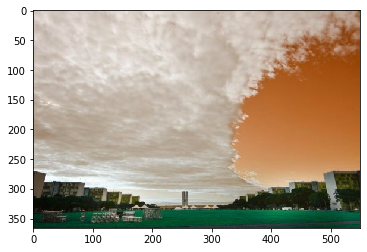

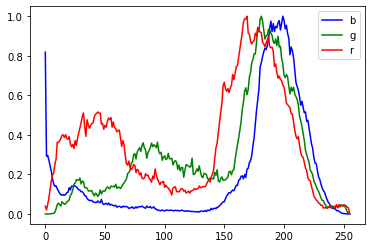

In [182]:
# Read image
img_sky = cv2.imread('sky.jpg')
plt.imshow(img_sky)
hist_sky = get_histogram(img_sky)

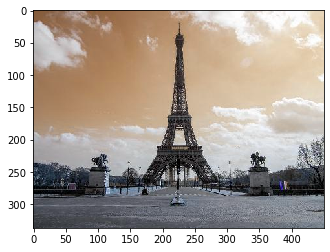

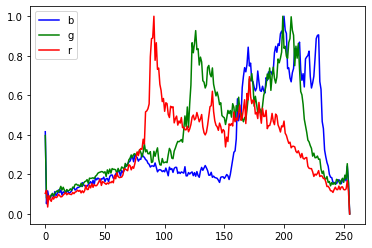

In [170]:
# Read image
img_paris = cv2.imread('paris.jpg')
plt.imshow(img_paris)
hist_paris = get_histogram(img_paris)

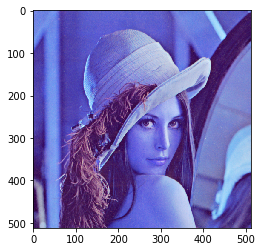

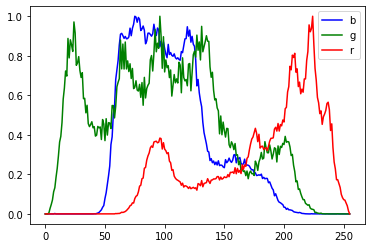

In [171]:
# Read image
# cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_lenna = cv2.imread('lenna.png')
plt.imshow(img_lenna)

# cv2.imshow("Lenna", img_lenna)
# #waits for user to press any key  
# #(this is necessary to avoid Python kernel form crashing) 
# cv2.waitKey(0)  
# #closing all open windows  
# cv2.destroyAllWindows()  

hist_lenna = get_histogram(img_lenna)

In [172]:
# Distance between lenna and sky
print('Distance between lenna and sky')
eucl_dist(img_lenna, img_sky)

# Distance between lenna and paris
print('Distance between lenna and paris')
eucl_dist(img_lenna, img_paris)

# Distance between paris and sky
print('Distance between paris and sky')
eucl_dist(img_paris, img_sky)

print('The end! (of the first class)')

Distance between lenna and sky
Euclidian Distance between images: 7.244718
Distance between lenna and paris
Euclidian Distance between images: 6.050371
Distance between paris and sky
Euclidian Distance between images: 3.915896
The end! (of the first class)


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

## LPB - Local binary patterns

Type of descriptor used for classification to identify textures.

### Steps
1. Convert to grayscale
2. Describe image in a local binary pattern
    1. Analyze the 8-neigborhood of a pixel and put 1 in the ones with a value greater than its value and 0 in the least ones;
    2. Set a sequencial "weight" to each neighbor between 0 and 7 the real value is going to be a power of 2 with this number;
    2. Set this pixel value as the sum of each new neighbor value.
3. Get histogram of image generated in step 2



In [173]:
def lpb_imgs(img):

    if(len(img.shape) > 2):
        row, col,_ = img.shape
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        row, col = img.shape

    new_weights = np.zeros([3, 3], dtype=int)
    new_img = np.zeros([row, col], dtype=int)
    for i in range(1, row - 1):
        for j in range(1, col - 1):
            weights = np.zeros([3, 3], dtype=int)
            weights = img[i-1 : i+2, j-1 : j+2] > img[i][j]
            
            p = 0
            for m in range(weights.shape[0]):
                for n in range(weights.shape[1]):
                    if(n != 1 or m != 1):
                        new_weights[m][n] = ((2**p) * int(weights[m][n]))
                        p = p + 1
            new_img[i][j] = np.sum(np.asarray(new_weights))

    return new_img

img_test = lpb_imgs(img)

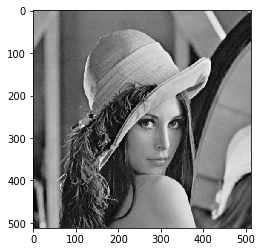

In [174]:
plt.figure()
plt.imshow(img)
plt.show()

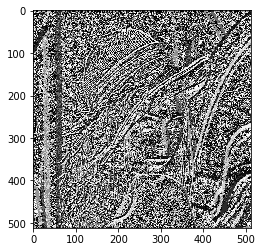

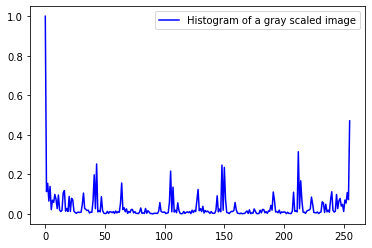

In [175]:
plt.figure()
plt.imshow(img_test)
plt.gray()
plt.show()
hist_test = get_histogram(img_test, my_version = True)

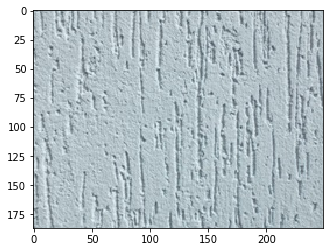

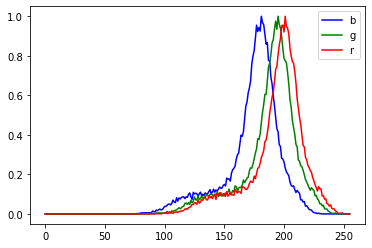

In [176]:
# Read image
img_text1 = cv2.imread('texture1.jpg')
plt.imshow(img_text1)
hist_text1 = get_histogram(img_text1)

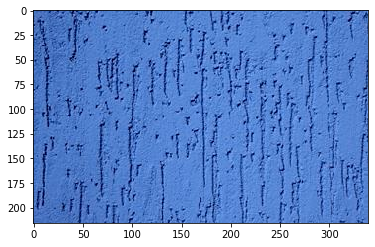

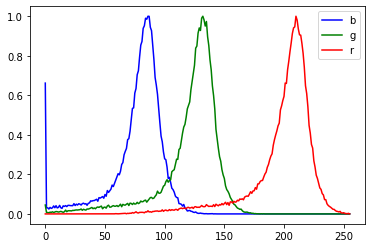

In [177]:
# Read image
img_text2 = cv2.imread('texture2.jpg')
plt.imshow(img_text2)
hist_text2 = get_histogram(img_text2)

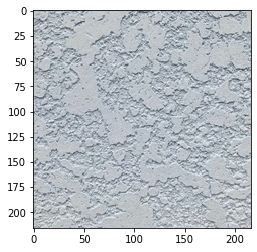

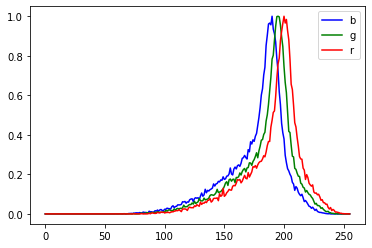

In [178]:
# Read image
img_text3 = cv2.imread('texture3.jpg')
plt.imshow(img_text3)
hist_text3 = get_histogram(img_text3)

### Without LPB

In [179]:
# Distance between lenna and sky
print('Distance between 1 and 2')
eucl_dist(img_text1, img_text2)

# Distance between lenna and paris
print('Distance between 2 and 3')
eucl_dist(img_text2, img_text3)

# Distance between paris and sky
print('Distance between 3 and 1')
eucl_dist(img_text3, img_text1)

Distance between 1 and 2
Euclidian Distance between images: 4.584849
Distance between 2 and 3
Euclidian Distance between images: 4.520170
Distance between 3 and 1
Euclidian Distance between images: 1.191359


1.191358712628254

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

### With LPB

In [188]:
lpb_img1 = lpb_imgs(img_text1)
lpb_img2 = lpb_imgs(img_text2)
lpb_img3 = lpb_imgs(img_text3)

# Distance between lenna and sky
print('Distance between 1 and 2')
eucl_dist(lpb_img1, lpb_img2, my_version = True)

# Distance between lenna and paris
print('Distance between 2 and 3')
eucl_dist(lpb_img2, lpb_img3, my_version = True)

# Distance between paris and sky
print('Distance between 3 and 1')
eucl_dist(lpb_img3, lpb_img1, my_version = True)

Distance between 1 and 2
Euclidian Distance between images: 0.493097
Distance between 2 and 3
Euclidian Distance between images: 0.456616
Distance between 3 and 1
Euclidian Distance between images: 0.735974


0.7359738872976533

## Binary Images

Images represented by just 2 values: 0 or 1 / White or Black/ True or False

### What can we extract from an binary image?
**1. Get outline of a form:** verify the 4-neighborhood of a pixel. If one of them is white (or the same color as the background), this pixel is a contour of the image.

In [234]:
def get_outline_bin(img, back_color = 255, obj_color = 0, plot = True):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    row, col = img.shape
    new_img = np.multiply(np.ones([row, col]), back_color) 
    for i in range(1, row - 1):
        for j in range(1, col - 1):
            pixel = img[i][j]
            p_u = img[i - 1][j]
            p_d = img[i + 1][j]
            p_r = img[i][j + 1]
            p_l = img[i][j - 1]
            if(pixel == obj_color):
                if((p_u == back_color) or (p_d == back_color) or (p_r == back_color) or (p_l == back_color)):
                    new_img[i][j] = obj_color
    plt.figure(figsize=[10, 10])
    plt.imshow(new_img)
    plt.title('Binary figure outline')
    plt.show()
    return new_img

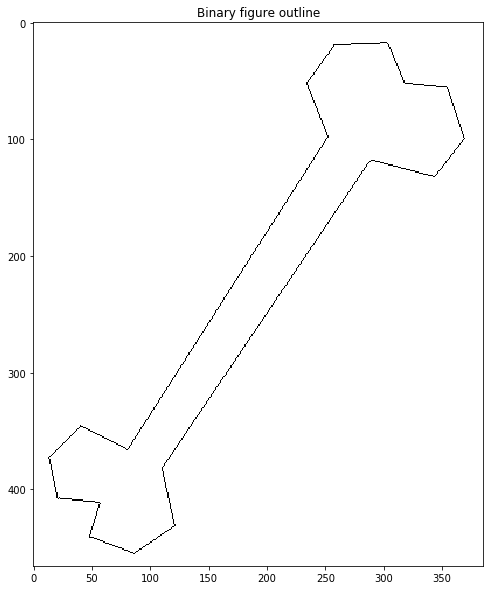

In [235]:
# Read image
img_bin = cv2.imread('bone.png')
con_img = get_outline_bin(img_bin)

**2. Centroid of an image:** Average values of the cordinates. Sum all and divide by the quantity of points. 

In [258]:
def get_centroid(img, obj_color = 0, plot = True):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    row, col = img.shape
    
    centroid_x = 0
    centroid_y = 0
    points = 0
    
    for i in range(1, row - 1):
        for j in range(1, col - 1):
            if(img[i][j] == obj_color):
                centroid_x += i
                centroid_y += j
                points += 1
                
    centroid_x = centroid_x / points 
    centroid_y = centroid_y / points 
    
    centroid = (int(centroid_x), int(centroid_y))
    print(int(centroid_x), int(centroid_y))
    cv2.circle(img, centroid, 1, (200, 0, 0), 10)
    
    plt.figure(figsize=[10, 10])
    plt.imshow(img)
    plt.title('Centroid of a binary figure')
    plt.show()
    
    return centroid

220 196


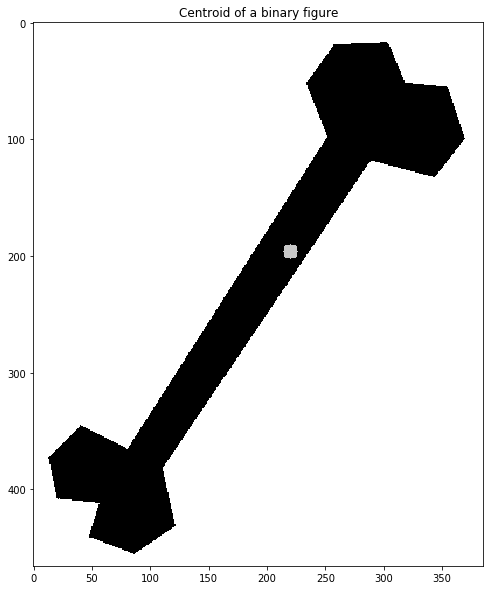

(220, 196)

In [259]:
get_centroid(img_bin)

**3. Signature:** Calculate the distance between each point of the contour to the centroid of an image

**4. Aspect ratio:** Ratio between the height and the width of an image

**5. Solidity:** Define if object is concave or convex

$ S = \frac{area_{object}}{area_{non-convex}}$

In [262]:
def aspect_ratio(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    x, y, w, h = cv2.boundingRect(img)
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    if(h > w):
        aspect_ratio = float(w)/h
    else:
        aspect_ratio = float(h)/w
        
    return aspect_ratio